Time series analysis. In this part, we focus on time series data of Stereo-seq Mouse embryo

In [1]:
import scanpy as sc
import numpy as np
import sctm
import squidpy as sq
import pandas as pd
import seaborn as sns
import anndata as ad

%load_ext autoreload
%autoreload 2

/home/chengwei/miniconda3/envs/torch/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/chengwei/miniconda3/envs/torch/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


The processed data can be found at https://zenodo.org/records/10988053.

In [2]:
adata = sc.read_h5ad(
    "../../../../STAMP/Reproducibility/ProcessedData/Stereo_embryo/adata_clean.h5ad"
)
adata.var_names_make_unique()

/home/chengwei/miniconda3/envs/torch/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


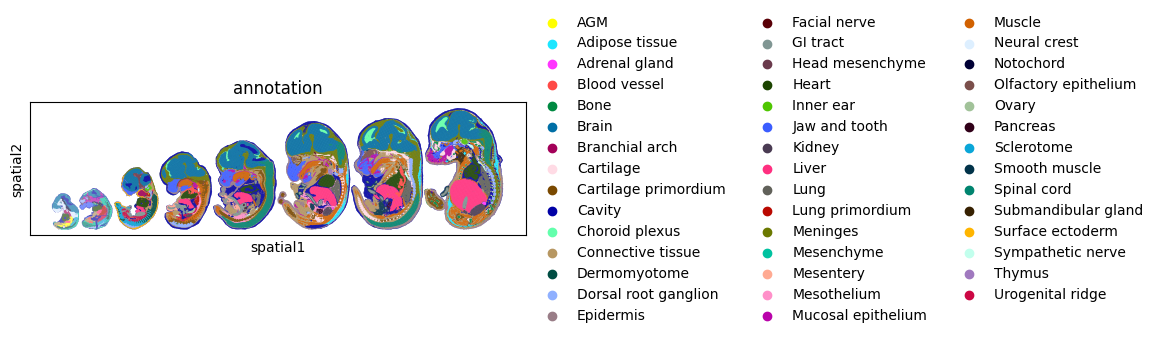

In [3]:
sctm.pl.spatial(adata, color="annotation", size=0.3)

We work with a downsampled data here, since that the whole process will take a few hours 

In [4]:
adata_downsampled = sc.pp.subsample(adata, fraction=0.1, copy=True)

In [5]:
# We uses roughly (1/1000) * size
sq.gr.spatial_neighbors(adata_downsampled, n_neighs=round(1 / 1000 * adata.n_obs))

In [43]:
sctm.seed.seed_everything(0)

model = sctm.stamp.STAMP(
    adata_downsampled,
    n_topics=40,
    layer="count",
    time_covariate_keys="time",
    # gene_likelihood="poisson",
)

# We used a weighted sampler here as that the first timepoint is extremly small compared to the last timepoint.
model.train(device="cuda:0", sampler = "W")

Computing background frequencies
Computing background frequencies
Computing background frequencies
Computing background frequencies
Computing background frequencies
Computing background frequencies
Computing background frequencies
Computing background frequencies


  0%|                                                                                                                                     | 0/800 [00:00<?, ?it/s]/home/chengwei/miniconda3/envs/torch/lib/python3.9/site-packages/pyro/primitives.py:443: UserWarning: encoder.norm_topic.0.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(
/home/chengwei/miniconda3/envs/torch/lib/python3.9/site-packages/pyro/primitives.py:443: UserWarning: encoder.norm_topic.1.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(
/home/chengwei/miniconda3/envs/torch/lib/python3.9/site-packages/pyro/primitives.py:443: UserWarning: encoder.norm_topic.2.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(
/home/c

Early Stopping


In [45]:
topic_prop = model.get_cell_by_topic()
beta = model.get_feature_by_topic()
for i in topic_prop.columns:
    adata_downsampled.obs[i] = topic_prop[i]

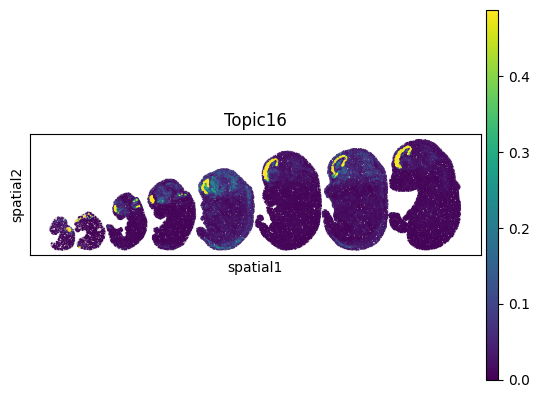

In [49]:
sctm.pl.spatial(adata, color = "Topic16", size = 5, vmax = 'p99')

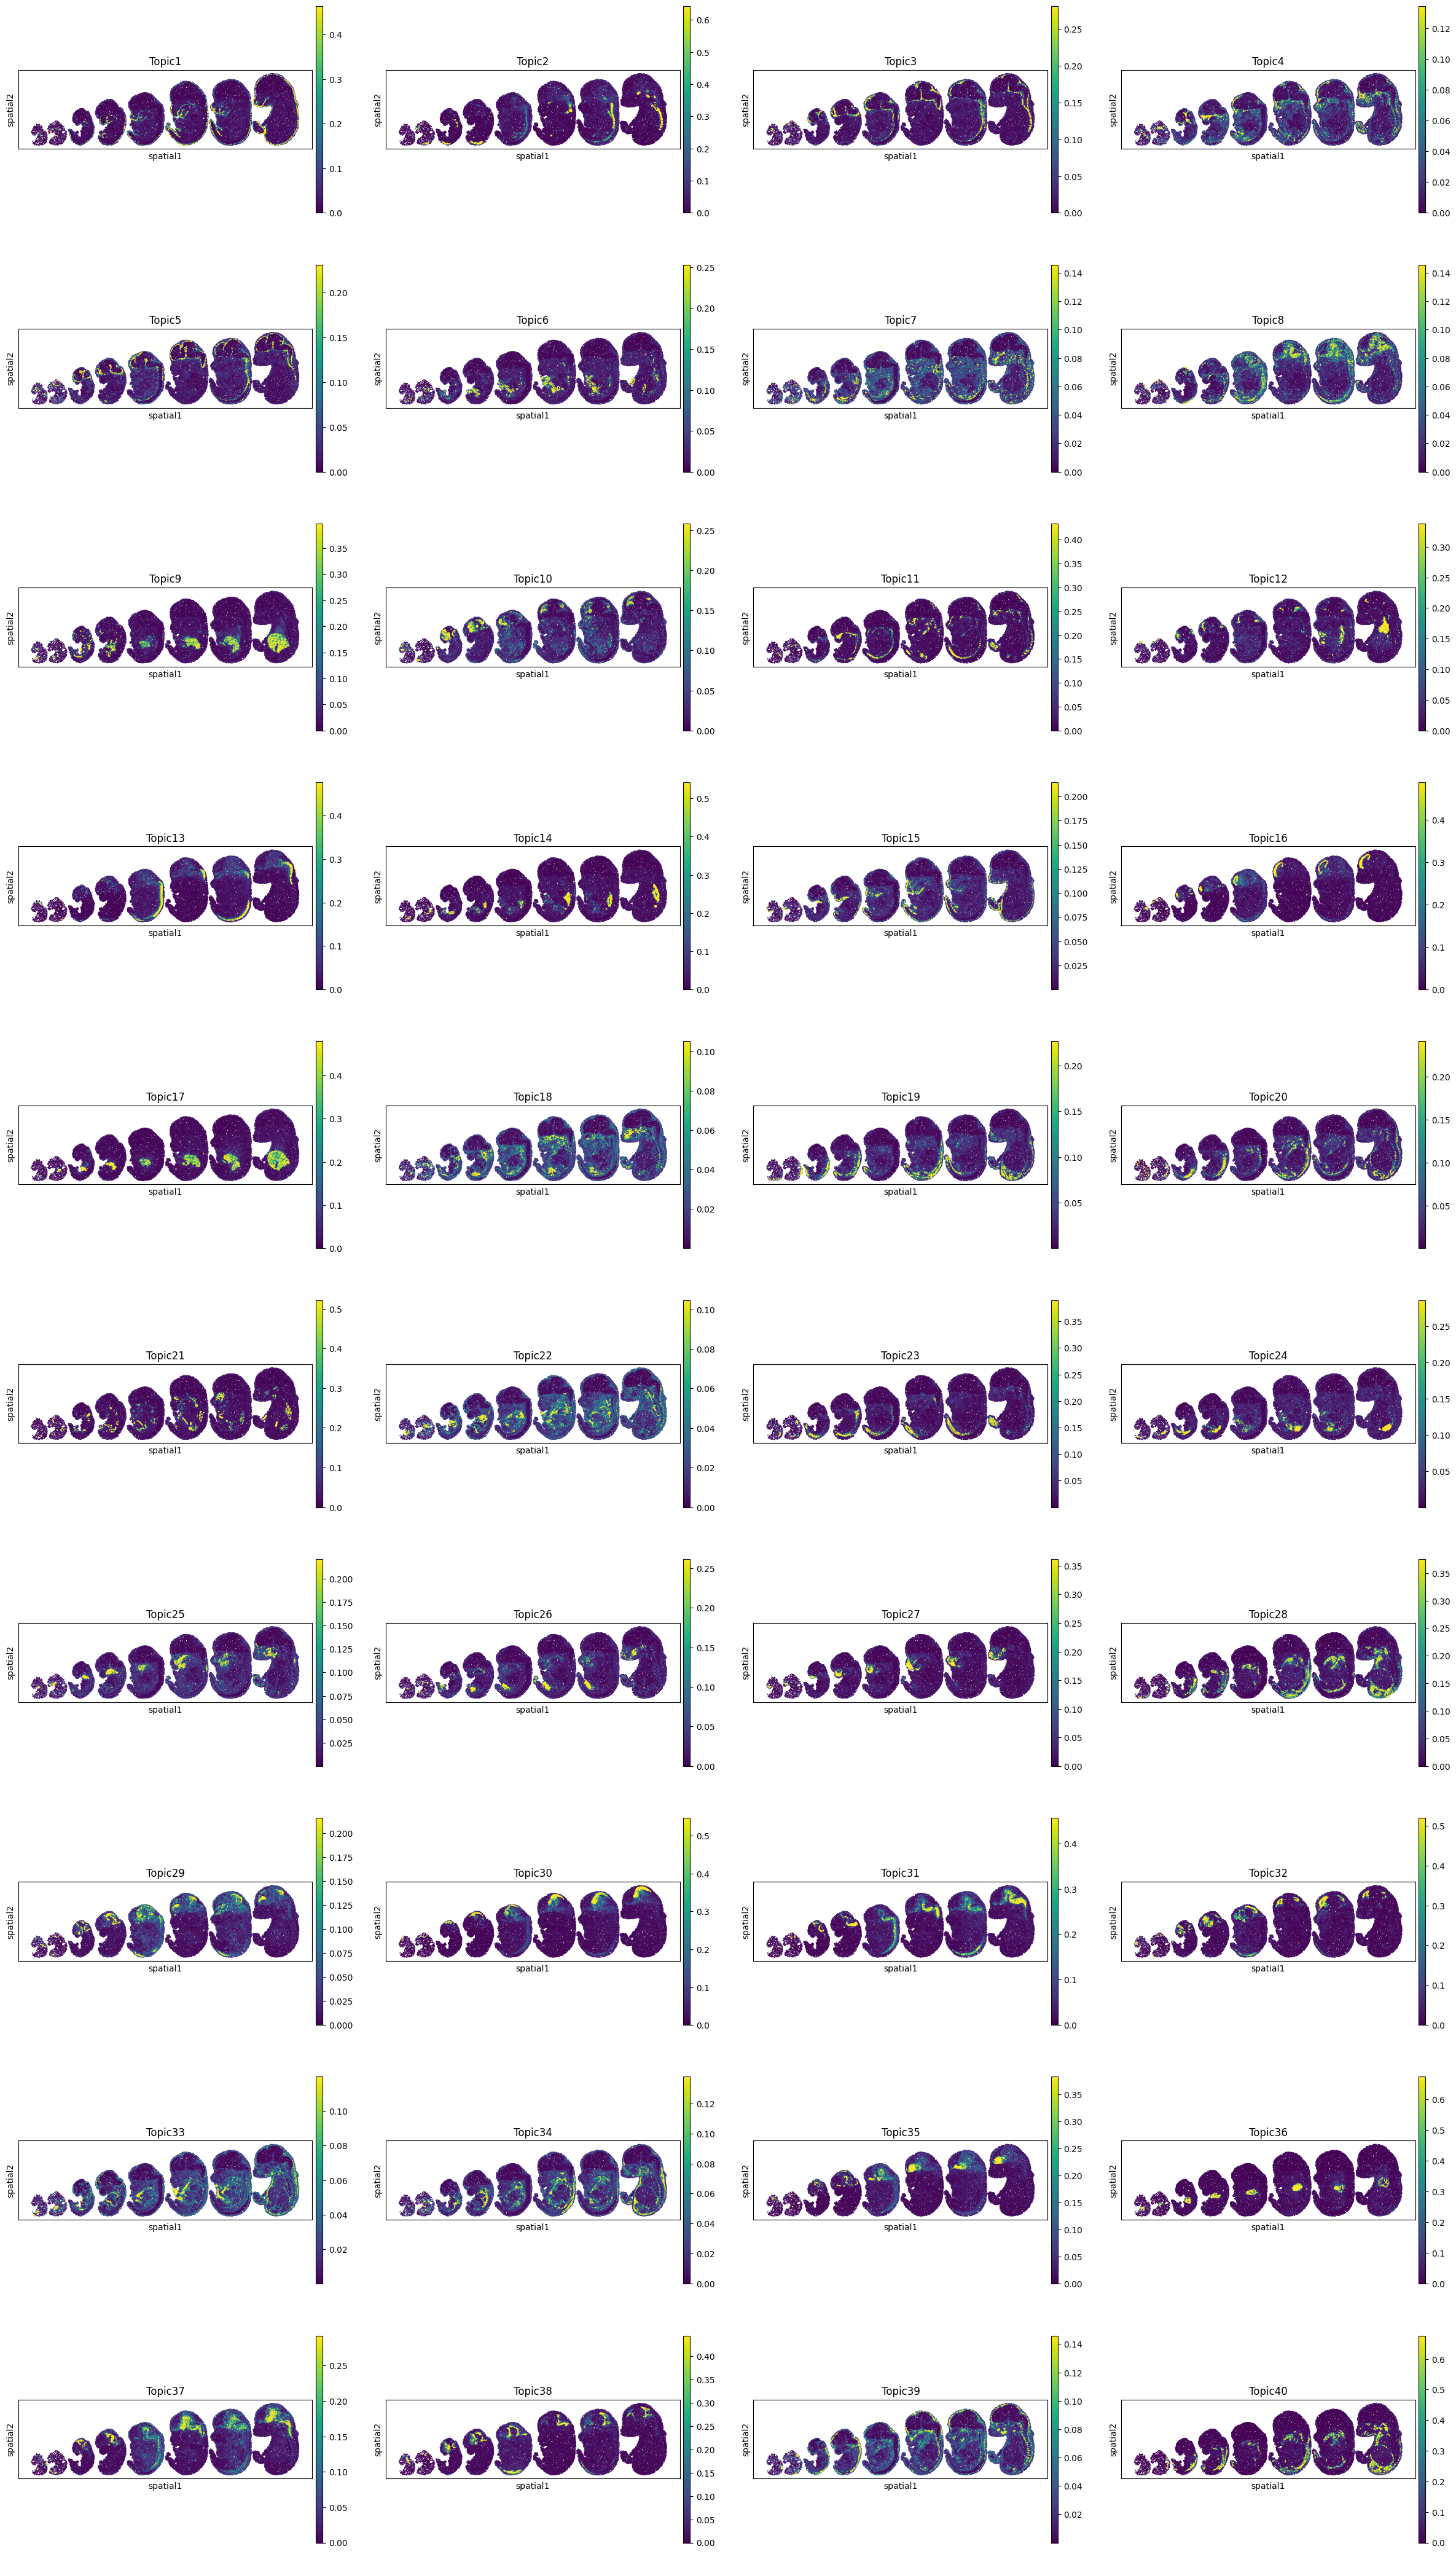

In [48]:
sctm.pl.spatial(adata_downsampled, color=topic_prop.columns, size = 5, vmax="p99")

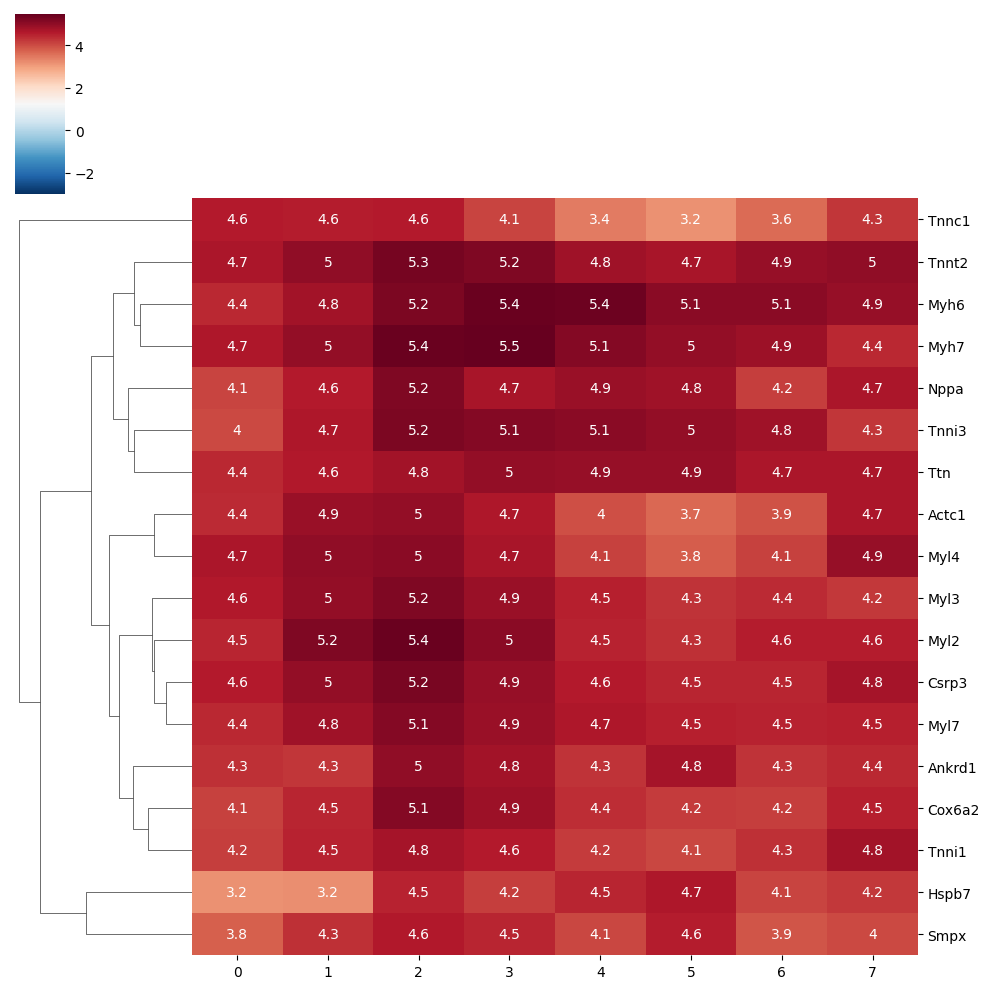

In [58]:
# Topic 36 is the heart
topic = "Topic36"
genes = []
for i in range(8):
    genes += beta.xs(topic, level=1).transpose().nlargest(10, i).index.tolist()
genes = np.unique(genes)

beta.xs(topic, level=1).rank(ascending=False, axis=1).transpose().loc[genes]

sns.clustermap(
    beta.xs(topic, level=1).transpose().loc[genes],
    col_cluster=False,
    cmap="RdBu_r",
    vmin=-3,
    xticklabels=True,
    yticklabels=True,
    annot=True,
)

In [53]:
sctm.pl.spatial(adata_downsampled, color=["Topic9", "Topic17"], size = 5, vmax="p99")

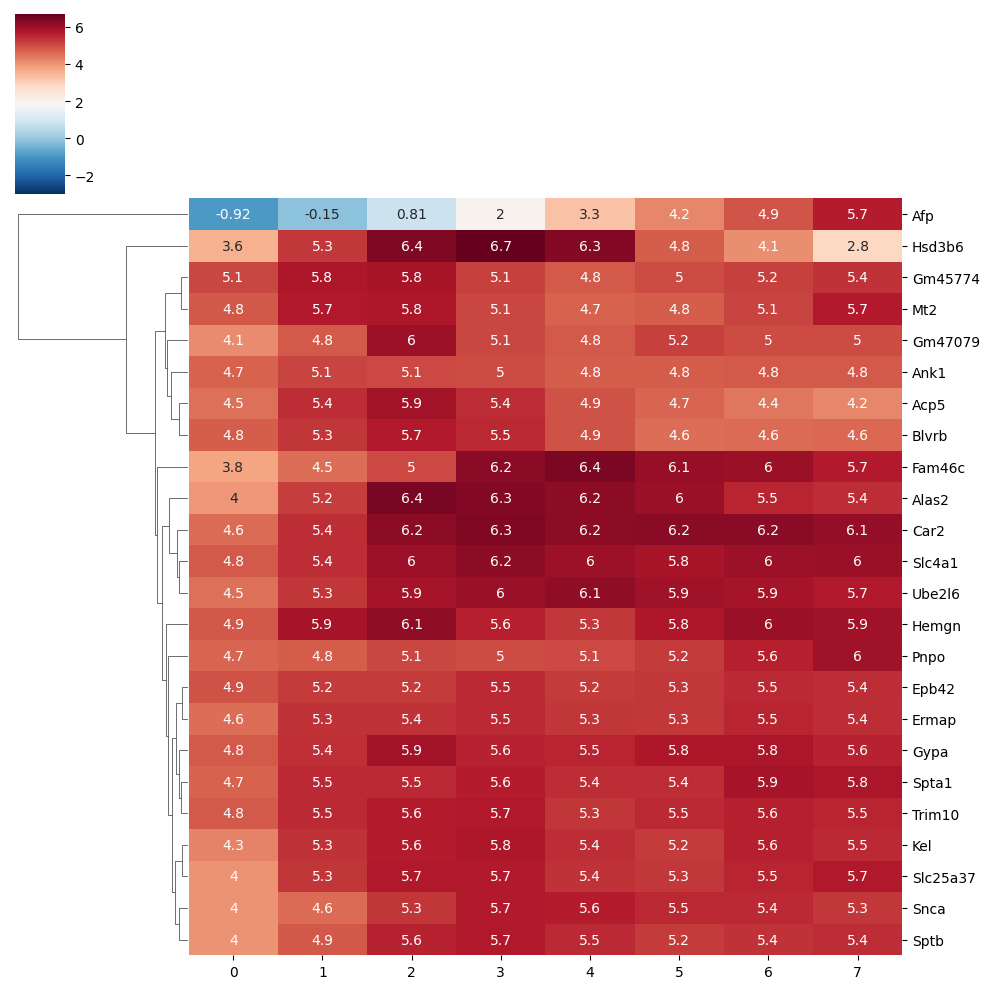

In [55]:
# Topic 9 is the hematopoesis
topic = "Topic9"
genes = []
for i in range(8):
    genes += beta.xs(topic, level=1).transpose().nlargest(10, i).index.tolist()
genes = np.unique(genes)

beta.xs(topic, level=1).rank(ascending=False, axis=1).transpose().loc[genes]

sns.clustermap(
    beta.xs(topic, level=1).transpose().loc[genes],
    col_cluster=False,
    cmap="RdBu_r",
    vmin=-3,
    xticklabels=True,
    yticklabels=True,
    annot=True,
)

In [56]:
# Topic 5 is the heart
topic = "Topic17"
genes = []
for i in range(8):
    genes += beta.xs(topic, level=1).transpose().nlargest(20, i).index.tolist()
genes = np.unique(genes)

beta.xs(topic, level=1).rank(ascending=False, axis=1).transpose().loc[genes]

sns.clustermap(
    beta.xs(topic, level=1).transpose().loc[genes],
    col_cluster=False,
    cmap="RdBu_r",
    vmin=-3,
    xticklabels=True,
    yticklabels=True,
    annot=True,
)